## Loadings

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)
import matplotlib.colors as mcolors

import re
import datetime
from tqdm import tqdm_notebook, tqdm
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings("ignore")

In [179]:
df = pd.read_csv("./data/Eluvio_DS_Challenge.csv")

In [180]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


## Data Cleaning

**TODO**
 - check missing values
 - check single value columns
 - check nulls
 - convert datetime

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


In [182]:
# check if 'up_votes' contains null
df['up_votes'].apply(pd.isnull).astype(int).sum()

0

In [183]:
# check uniqueness of 'down_votes' and 'category' 
print(df['down_votes'].unique())
print(df['category'].unique())
print(df['over_18'].unique())

[0]
['worldnews']
[False  True]


In [184]:
# Since 'down_votes' only contains 0 and 'category' only contains 'worldnews', these two columns can be removed
df.drop(columns=['down_votes', 'category'], inplace=True)

In [185]:
# convert object to datetime
df['date_created'] = df['date_created'].apply(pd.to_datetime)
df['time_created'] = df['time_created'].apply(pd.to_datetime, unit='s')

## Explore Time Features

**TODO**

 - decompose 'date_created' & 'time_created'
 - number of news over dates
 - number of news over hours 
 - distribution of up_votes

In [186]:
# decompose 'date_created'
df['year'] = df['date_created'].apply(lambda x: x.year)
df['month'] = df['date_created'].apply(lambda x: x.month)
df['week'] = df['date_created'].apply(lambda x: x.dayofweek)

In [187]:
# decompose 'time_created'
df['hour'] = df['time_created'].apply(lambda x: x.hour)

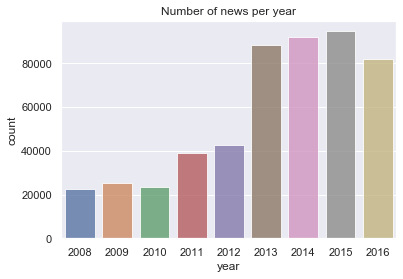

In [75]:
sns.countplot(df['year'], alpha=.8)
plt.title("Number of news per year")
plt.show()

In [188]:
# See if same partten exits in different years
years = df['year'].unique().tolist()

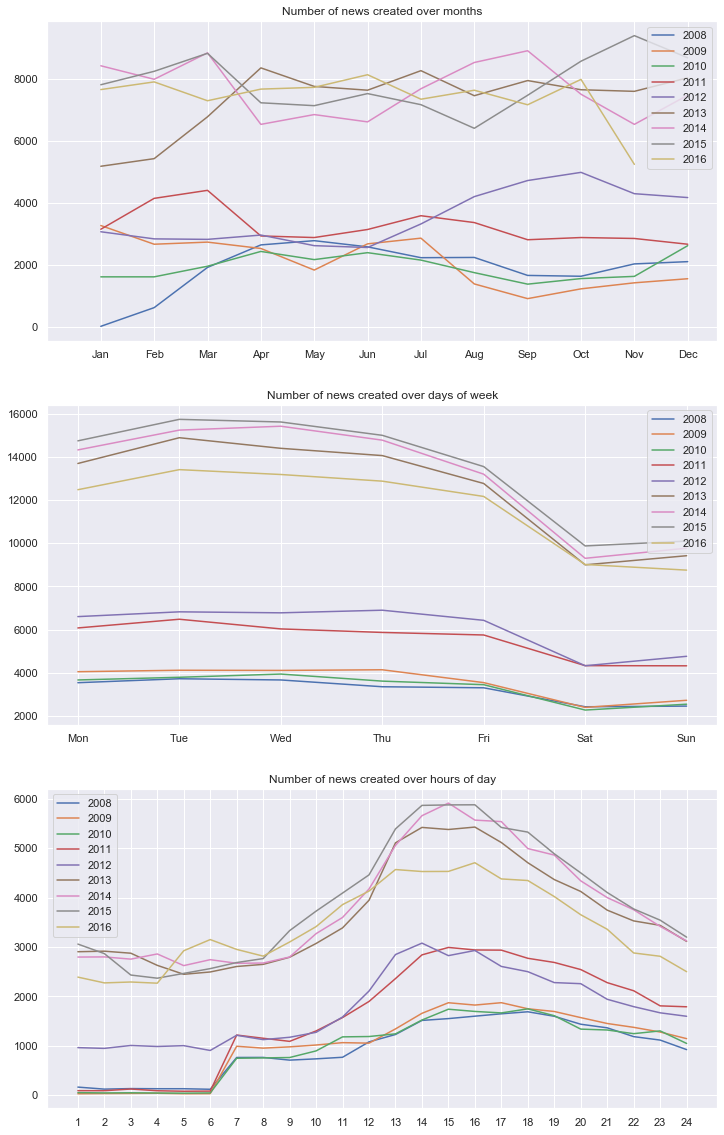

In [77]:
fig, axs = plt.subplots(3, 1, figsize=(12, 20))
for year in years:
    df_year = df[df['year']==year]
    month_count = df_year['month'].value_counts()
    sns.lineplot(x=month_count.index, y=month_count.values, legend='full', label=year, ax=axs[0])
    
    week_count = df_year['week'].value_counts()
    sns.lineplot(x=week_count.index, y=week_count.values, legend='full', label=year, ax=axs[1])
    
    hour_count = df_year['hour'].value_counts()
    sns.lineplot(x=hour_count.index, y=hour_count.values, legend='full', label=year, ax=axs[2])

##overall trend
#month_count = df['month'].value_counts()
#sns.lineplot(x=month_count.index, y=month_count.values, legend='full', label="overall", ax=axs[0])
axs[0].set_title("Number of news created over months")  
axs[0].set_xticks(range(13))
axs[0].set_xticklabels(['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#week_count = df['week'].value_counts()
#sns.lineplot(x=week_count.index, y=week_count.values, legend='full', label="overall", ax=axs[1])
axs[1].set_title("Number of news created over days of week") 
axs[1].set_xticks(range(7))
axs[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
#hour_count = df['hour'].value_counts()
#sns.lineplot(x=hour_count.index, y=hour_count.values, legend='full', label="overall", ax=axs[2])    
axs[2].set_title("Number of news created over hours of day")
axs[2].set_xticks(range(24))
axs[2].set_xticklabels([i for i in range(1, 25)])

plt.show()

**Summary**

It seems from the above plots that the number of news published is relatively small from 2008 to 2010 and it increased a little in 2011 and 2012. Through 2013 to 2016 the number is much higher than previous years. It's also obvious that there are more news published in weekdays than weekend, in afternoons and evenings than the rest of days. No significant pattern found within month of the news created. 

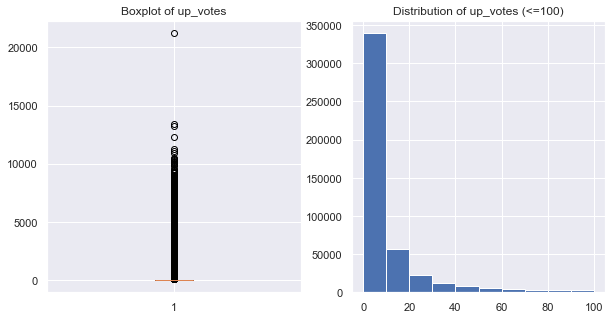

In [78]:
# distribution of up_votes
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(10, 5))
axs[0].boxplot(df['up_votes'])
axs[1].hist(df[df['up_votes']<=100]['up_votes'])
axs[0].set_title("Boxplot of up_votes")
axs[1].set_title("Distribution of up_votes (<=100)")
plt.show()

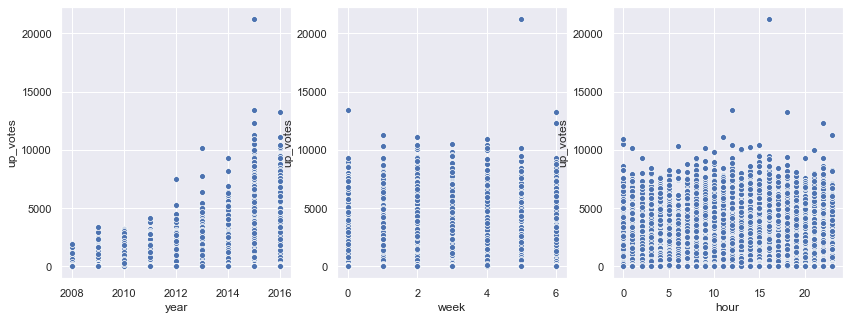

In [79]:
# See if there is any correlation between upvotes vs. time features
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
sns.scatterplot(x='year', y='up_votes', data=df, ax=axs[0])
sns.scatterplot(x='week', y='up_votes', data=df, ax=axs[1])
sns.scatterplot(x='hour', y='up_votes', data=df, ax=axs[2])
plt.show()

In [80]:
df.groupby('year').mean()['up_votes']

year
2008     15.823906
2009     25.697511
2010     38.427444
2011     53.979581
2012     92.048355
2013     91.272569
2014    119.458372
2015    161.502077
2016    182.005654
Name: up_votes, dtype: float64

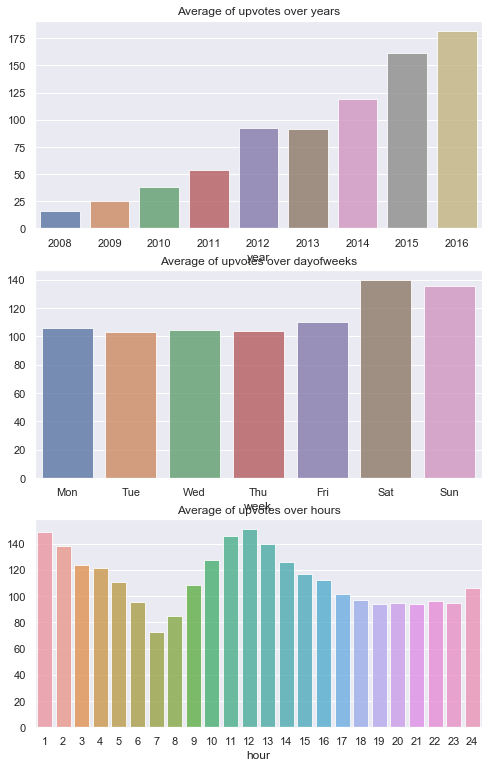

In [189]:
fig, axs = plt.subplots(3, 1, figsize=(8, 13))
year_avg = df.groupby('year').mean()['up_votes']
week_avg = df.groupby('week').mean()['up_votes']
hour_avg = df.groupby('hour').mean()['up_votes']
sns.barplot(x=year_avg.index, y=year_avg.values, ax=axs[0], alpha=.8)
sns.barplot(x=week_avg.index, y=week_avg.values, ax=axs[1], alpha=.8)
sns.barplot(x=hour_avg.index, y=hour_avg.values, ax=axs[2], alpha=.8)
axs[0].set_title('Average of upvotes over years')
axs[1].set_title('Average of upvotes over dayofweeks')
axs[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axs[2].set_title('Average of upvotes over hours')
axs[2].set_xticklabels(range(1, 25))
plt.show()

**Summary**

Most news have less than 20 upvotes. There is no strong indication that time of the day and day of week created affects the upvotes of the news, but more votes come in as year increases. Average upvotes are higher on weekends. Average upvotes are higher after midnight and around midday. This makes sense, since important international news are ofter broadcast at these time.

## Explore Author Info

**TODO**

 - frequencies of publishing for authors / authors published most news
 - over_18 v.s. not over_18


False    508916
True        320
Name: over_18, dtype: int64


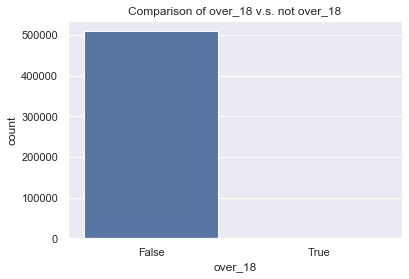

In [82]:
print(df['over_18'].value_counts())
fig, ax = plt.subplots()
ax = sns.countplot(x="over_18", data=df)
ax.set_title("Comparison of over_18 v.s. not over_18")
#ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [83]:
# Check if there is any relation between upvotes and whether or not author is over 18
over18_count = df.groupby('over_18').mean()['up_votes']
over18_count

over_18
False    112.067681
True     380.375000
Name: up_votes, dtype: float64

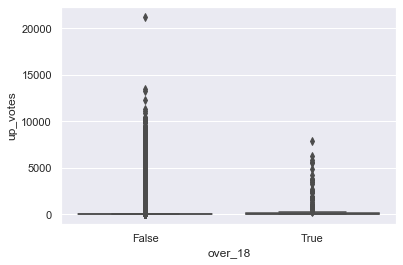

In [84]:
sns.boxplot(x='over_18', y='up_votes', data=df);

**Summary**

Only a few percentage of authors are over 18. But the average upvotes authors over 18 received triples received by authors not over 18. 

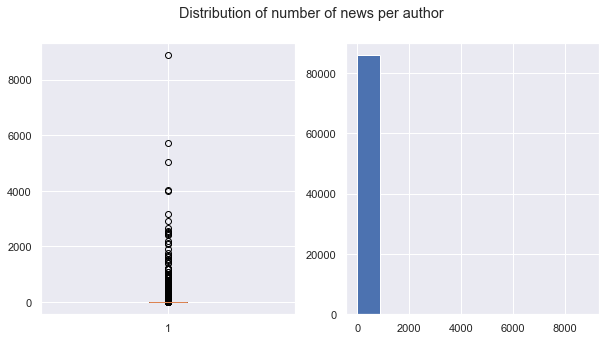

In [190]:
author_counts = df['author'].value_counts()
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(10, 5))
axs[0].boxplot(author_counts)
axs[1].hist(author_counts)
fig.suptitle("Distribution of number of news per author")
plt.show()

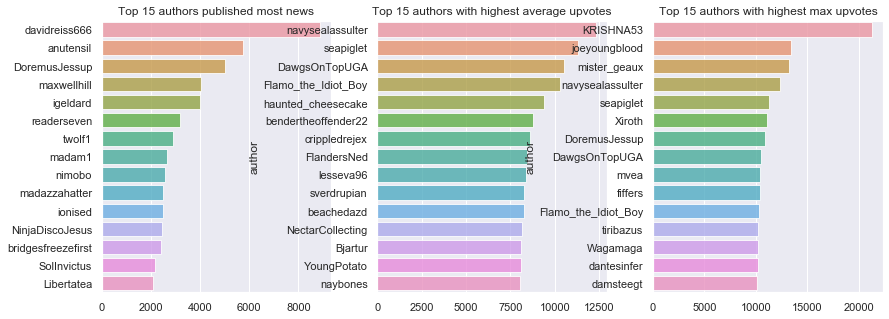

In [191]:
# top 15 authors
author_counts_top15 = author_counts[:15,]
ave_upvotes_per_author = df.groupby("author").mean()['up_votes'].sort_values()[::-1]
ave_upvotes_per_author_top15 = ave_upvotes_per_author[:15,]
max_upvotes_per_author = df.groupby("author").max()['up_votes'].sort_values()[::-1]
max_upvotes_per_author_top15 = max_upvotes_per_author[:15,]
fig, axs = plt.subplots(1, 3, sharey=False, figsize=(14, 5))
sns.barplot(y=author_counts_top15.index, x=author_counts_top15.values, alpha=.8, ax=axs[0])
axs[0].set_title("Top 15 authors published most news")
sns.barplot(y=ave_upvotes_per_author_top15.index, x=ave_upvotes_per_author_top15.values, alpha=.8, ax=axs[1])
axs[1].set_title("Top 15 authors with highest average upvotes")
sns.barplot(y=max_upvotes_per_author_top15.index, x=max_upvotes_per_author_top15.values, alpha=.8, ax=axs[2])
axs[2].set_title("Top 15 authors with highest max upvotes")
plt.show()

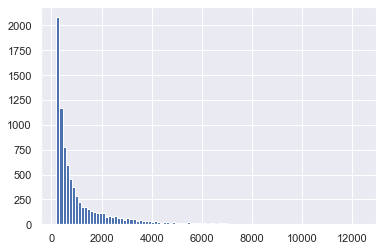

In [87]:
plt.hist(ave_upvotes_per_author[ave_upvotes_per_author>200], bins=100);

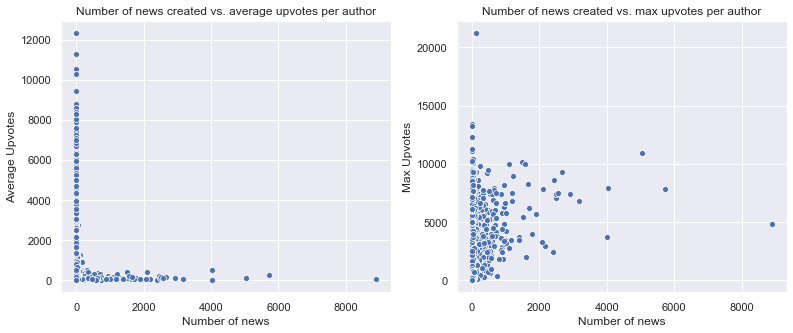

In [88]:
# Test if there is any relationship between number of news created and average/max upvotes for an author
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
sns.scatterplot(x = author_counts, y = ave_upvotes_per_author, ax=axs[0])
sns.scatterplot(x = author_counts, y = max_upvotes_per_author, ax=axs[1])
axs[0].set_title("Number of news created vs. average upvotes per author")
axs[1].set_title("Number of news created vs. max upvotes per author")
axs[0].set_xlabel("Number of news")
axs[1].set_xlabel("Number of news")
axs[0].set_ylabel("Average Upvotes")
axs[1].set_ylabel("Max Upvotes")
plt.show()

**Summary**

Most authors have only created a few news and most news have less than 20 upvotes. There is no indication that the more news an author created, the higer average/max upvotes he/she will get

## Explore Text Info

**TODO**

 - Text cleaning
 - Count of words in title
 - WordCloud in titles 
 - WordCloud for each year
 - WordCloud for author over 18 and not
 - Topic Modeling



In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
stopwords = stopwords.words('english')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jingciwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jingciwang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jingciwang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jingciwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [192]:
def replace_elongated(text):

    def _replace_elongated(token):
        """ Replaces an elongated word with its basic form, unless the word exists in the lexicon. 
            Serves as spell check and lemmatization
            """

        repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        repl = r'\1\2\3'
        if wordnet.synsets(token):
            return token
        repl_token = repeat_regexp.sub(repl, token)
        if repl_token != token:      
            return _replace_elongated(repl_token)
        else:       
            return repl_token

    return ' '.join([_replace_elongated(token) if re.search(r'(.)\1{3,}', token) else token for token in text.split()])

In [193]:
def text_clean(text):
    
    # Remove spaces in the front and tail of each title
    text = text.strip()
    # Remove special characters
    text = re.sub('[^A-Za-z-\s]+', '', text)
    # Convert all to lowercase
    text = text.lower()
    # replace_elongated
    text = replace_elongated(text)
    # Remove dashs 
    text = re.sub('-', ' ', text)
    # Remove redundant spaces due to misformatting
    text = re.sub(' +', ' ', text)
    # Remove stopwords
    text = " ".join([w for w in text.split() if w not in stopwords])
    
    return text
def word_count(text, clean=True):
    if not clean:
        text = text_clean(text)
    return len(text.split())

In [194]:
df['title_clean'] = df['title'].apply(text_clean)
df['word_count'] = df['title_clean'].apply(word_count)

In [195]:
df[df['word_count']<1]

,time_created,date_created,up_votes,title,over_18,author,year,month,week,hour,title_clean,word_count
1368,2008-03-17 10:17:22,2008-03-17,0,هل كان في يوم.. العرب أخوة؟,False,sshakshir,2008,3,0,10,,0
1862,2008-03-24 12:19:33,2008-03-24,0,Бадминтон: россияне завоевали золото в Румынии,False,alofi,2008,3,0,12,,0
4322,2008-04-21 10:18:45,2008-04-21,0,Как просматривать закрытые страницы вконтакте,False,goplenz,2008,4,0,10,,0
8405,2008-06-05 18:19:56,2008-06-05,0,"69, 127",False,zemsta,2008,6,3,18,,0
10584,2008-07-01 07:23:53,2008-07-01,694,● ● ● ▬ ▬ ▬ ● ● ●,False,NorthernLights,2008,7,1,7,,0
19681,2008-11-22 03:54:38,2008-11-22,0,?,False,lilaz,2008,11,5,3,,0
21004,2008-12-07 19:54:08,2008-12-07,0,Банк ВТБ 24,False,supernatural-4,2008,12,6,19,,0
22047,2008-12-24 09:27:01,2008-12-24,0,خليجي 19,False,hamadalhamad,2008,12,2,9,,0
25111,2009-01-24 22:20:54,2009-01-24,0,666,False,sassanix,2009,1,5,22,,0
28751,2009-03-04 17:08:31,2009-03-04,0,Оазис-хостел | Самый лучший хостел Москвы,False,brutyz,2009,3,2,17,,0


In [196]:
# Because those title using other languages/characters gives zero length and not much infomation, I will just delete them
df = df[df['word_count']!=0]

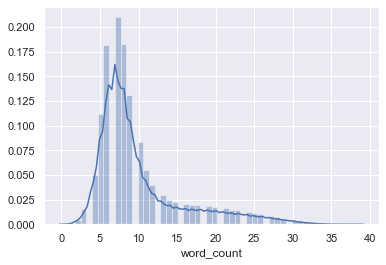

In [197]:
# Distribution of word count
sns.distplot(df['word_count']);

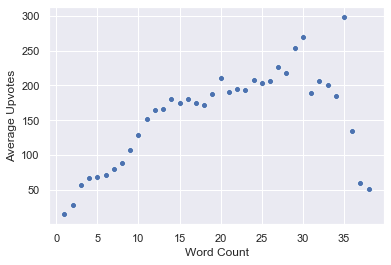

In [198]:
# Check if word count has relationship with upvotes
ave_upvote_by_wordcount = df.groupby('word_count').mean()['up_votes']
sns.scatterplot(x=ave_upvote_by_wordcount.index, y=ave_upvote_by_wordcount.values)
plt.xlabel('Word Count')
plt.ylabel('Average Upvotes')
plt.show()


**Summary**

It seems the total trend is that the more words a title contains, the more upvotes it will have

In [43]:
# Generate wordcloud
from wordcloud import WordCloud

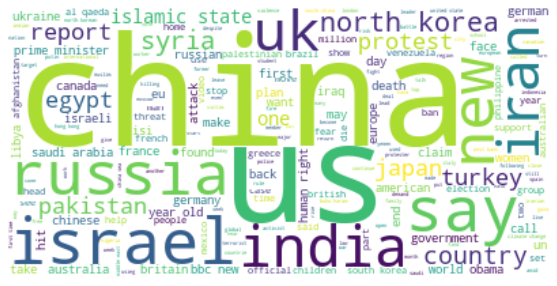

In [178]:
text = ' '.join([title for title in df['title_clean']])

wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

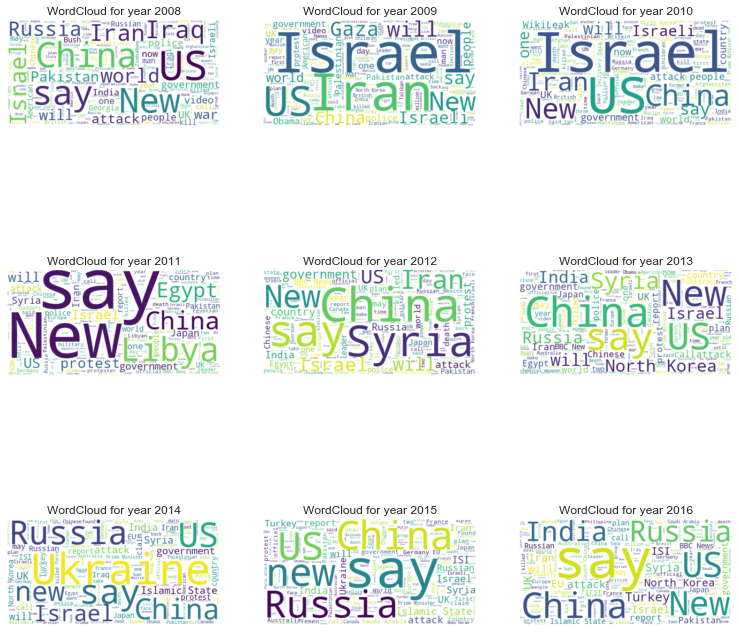

In [185]:
# wordcloud for each year
fig, axs = plt.subplots(3, 3, figsize=(13, 13))
i = 0
axs = axs.flatten()
for year in tqdm(years):
    text_year = ' '.join([title for title in df[df['year']==year]['title']])
    wordcloud = WordCloud(background_color='white').generate(text_year)
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].axis("off")
    axs[i].set_title("WordCloud for year {}".format(year))
    i += 1
plt.show
    

<function matplotlib.pyplot.show(*args, **kw)>

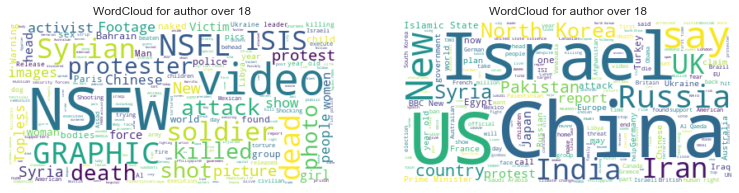

In [307]:
# wordcloud for different age level
fig, axs = plt.subplots(1, 2, figsize=(13, 8))

text_over18 = ' '.join([title for title in df[df['over_18']==True]['title']])
wordcloud = WordCloud(background_color='white').generate(text_over18)
axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis("off")
axs[0].set_title("WordCloud for author over 18")
text_not_over18 = ' '.join([title for title in df[df['over_18']==False]['title']])
wordcloud = WordCloud(background_color='white').generate(text_not_over18)
axs[1].imshow(wordcloud, interpolation='bilinear')
axs[1].axis("off")
axs[1].set_title("WordCloud for author over 18")
plt.show

**Summary**

Obviously the word distributions are dominated by countries. Intuitively, geolocation mentioned in news may affect the upvotes it received. Thus, it is worth to look at relationship between upvotes and locations mentioned


## Topic Analysis

**TODO**

- Find latent topic distribution

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn import metrics

import scipy
import scipy.cluster.hierarchy as sch

import pyLDAvis
import pyLDAvis.sklearn

In [159]:
import joblib
import os

In [321]:
# Only select a fraction of all titles 
text = df['title_clean'].sample(frac=.2)

# Because each title is a short sentence, here only use count_vectorizer instead of TF-IDF
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(text)
print(dtm.shape)

(101847, 47329)


In [356]:
# Define Search Param
search_params = {'n_components': [7, 10, 13], 'learning_decay': [.5, .7]}

# Init the Model
lda = LatentDirichletAllocation(random_state=42, n_jobs=-1, verbose=True)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(dtm)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 

iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=-1,
                                                 perp_tol=0.1, random_state=42,
                                                 topic_word_prior=None,
                                                 total_samples=1000000.0,
                                

In [357]:
# Best Model
lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", lda_model.perplexity(dtm))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 7}
Best Log Likelihood Score:  -2061020.4662732196
Model Perplexity:  6911.685064403806


In [363]:
if not os.path.exists("./model"):
    os.mkdir("./model")
joblib.dump(lda_model, "model/lda_model.joblib")

['model/lda_model.joblib']

In [414]:
for index,topic in enumerate(lda_model.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])

THE TOP 10 WORDS FOR TOPIC #0
['former', 'sex', 'party', 'uk', 'law', 'new', 'minister', 'government', 'president', 'court']
THE TOP 10 WORDS FOR TOPIC #1
['bbc', 'islamic', 'attack', 'iraq', 'isis', 'pakistan', 'syria', 'news', 'killed', 'us']
THE TOP 10 WORDS FOR TOPIC #2
['killed', 'city', 'syria', 'protest', 'un', 'protesters', 'people', 'syrian', 'dead', 'police']
THE TOP 10 WORDS FOR TOPIC #3
['saudi', 'state', 'iran', 'sea', 'new', 'chinese', 'south', 'oil', 'us', 'china']
THE TOP 10 WORDS FOR TOPIC #4
['first', 'million', 'people', 'found', 'world', 'old', 'new', 'death', 'years', 'year']
THE TOP 10 WORDS FOR TOPIC #5
['palestinian', 'un', 'gaza', 'us', 'israeli', 'iran', 'nuclear', 'korea', 'north', 'israel']
THE TOP 10 WORDS FOR TOPIC #6
['president', 'crisis', 'putin', 'russian', 'says', 'eu', 'world', 'us', 'ukraine', 'russia']


In [366]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

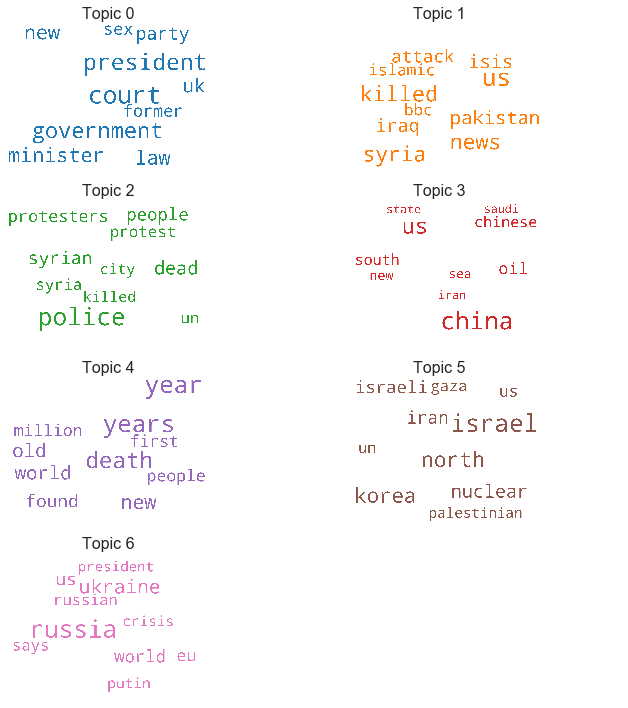

In [402]:
fig, axs = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True)
axs = axs.flatten()
topic_dict = {}
for i,topic in tqdm(enumerate(lda_model.components_)):
    fig.add_subplot(axs[i])
    topic_word = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-10000:]]
    freq = [topic[i] for i in topic.argsort()[-10000:]]
    freqdict = dict(zip(topic_word,freq))
    topic_dict[i] = freqdict
    cloud.generate_from_frequencies(freqdict, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

for j in range(i, len(axs)):
    fig.add_subplot(axs[j])
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [403]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, dtm, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6     -29.594002  60.112713       1        1  16.594876
0     -45.996586  11.891685       2        1  16.337464
4      20.368856  70.019325       3        1  15.940785
2      53.928768  31.704309       4        1  13.929241
1     -12.437127 -26.423267       5        1  13.485646
3       3.965971  21.797720       6        1  12.169597
5      37.524284 -16.517805       7        1  11.542391, topic_info=         Term         Freq        Total Category  logprob  loglift
22759  israel  2979.000000  2979.000000  Default  30.0000  30.0000
36807  russia  3497.000000  3497.000000  Default  29.0000  29.0000
9338    china  4670.000000  4670.000000  Default  28.0000  28.0000
44737      us  8063.000000  8063.000000  Default  27.0000  27.0000
29689   north  2159.000000  2159.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
4933   attack   423.212251  2388.923733   Topic7  -5.6462   0.4284
24838  leader   367.127918  1492.234934   Topic7  -5.7884   0.7568
4054     anti   353.229739  1439.403490   Topic7  -5.8270   0.7543
46542   world   363.057656  3230.915920   Topic7  -5.7995  -0.0268
40338   state   338.080912  2565.437790   Topic7  -5.8708   0.1325

[522 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
2347       7  0.993376  abbas
2357       5  0.985810    abc
2511       2  0.993182  abuse
2511       3  0.002580  abuse
2511       4  0.002580  abuse
...      ...       ...    ...
46903      4  0.102835  yemen
46903      5  0.848713  yemen
46903      6  0.045560  yemen
47232      3  0.996551   zika
47315      1  0.967361   zuma

[1282 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 5, 3, 2, 4, 6])

In [404]:
if not os.path.exists("./Vis"):
    os.mkdir("./Vis")
pyLDAvis.save_html(panel, './Vis/lda_topic.html')

## Feature Engineering

Based on above analysis, the following transformation should be useful for predicting upvotes. Further feature selection would be required
 
 - considering the increse trend over years, construct a predictor reflecting years to now
 - a predictor indicating whether the news is released on weekend
 - a predictor indicating whether the new is broadcast after midnight or around midday
 - over_18
 - a predictor indicating whether the author has high average upvotes (3rd quantile of 3rd quantile)
 - title length

In [199]:
ave_upvotes_per_author[ave_upvotes_per_author > 25].describe()

count    21548.000000
mean       485.051977
std        975.280414
min         25.038462
25%         49.000000
50%        121.722222
75%        406.892857
max      12333.000000
Name: up_votes, dtype: float64

In [200]:
topauthors = ave_upvotes_per_author[ave_upvotes_per_author>406].index.tolist()

In [201]:
df['yearTonow'] = df['year'].apply(lambda x: datetime.datetime.now().year - x)
df['weekend'] = df['week'].apply(lambda x: 1 if x in [5, 6] else 0)
df['newshour'] = df['hour'].apply(lambda x: 1 if x in [i for i in range(4)] + [i for i in range(9, 14)] else 0)
df['over_18'] = df['over_18'].astype(int)
tqdm.pandas()
df['topauthor'] = df['author'].progress_apply(lambda x: 1 if x in topauthors else 0)

In [163]:
new_df = df[['yearTonow', 'weekend', 'newshour', 'over_18', 'topauthor', 'word_count', 'title_clean', 'title']]

In [165]:
new_df.to_csv('./data/cleandata.csv', index=False)
label = df[['up_votes']]
label.to_csv("./data/label.csv", index=False)

In [134]:
new_df = pd.read_csv("./data/cleandata.csv")
label = pd.read_csv("./data/label.csv")

### Meta Data

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectFwe, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler


In [167]:
# split data into train set and test set
df_train, df_test, val_train, val_test = train_test_split(new_df, label['up_votes'], test_size=0.2, random_state=42) 

In [168]:
joblib.dump(train_test_split, "./cache/train_test_split.joblib")

['./cache/train_test_split.joblib']

In [173]:
# only 'yeartonow' and 'word_count' potentially need standardization
scaler = StandardScaler()
df_train[['yearTonow', 'word_count']] = \
 pd.DataFrame(scaler.fit_transform(df_train[['yearTonow', 'word_count']])).set_index(df_train.index)

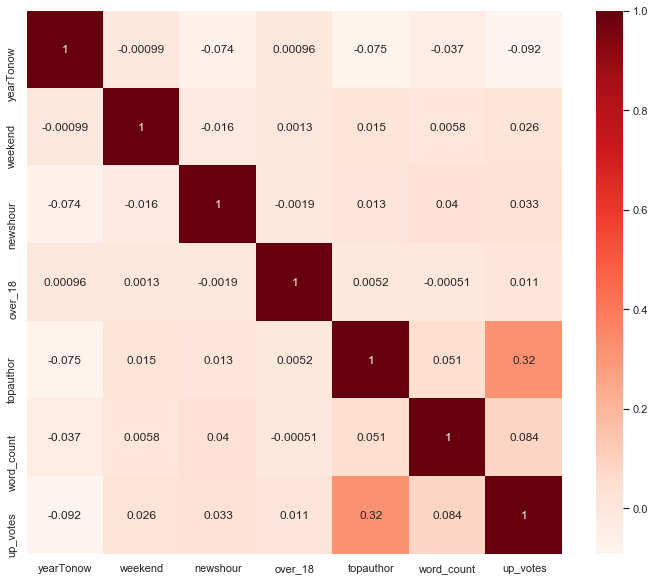

In [175]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = pd.concat([df_train[['yearTonow', 'weekend', 'newshour', 'over_18', 'topauthor', 'word_count']],val_train], axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [174]:
df_train.head()

,yearTonow,weekend,newshour,over_18,topauthor,word_count,title_clean,title
434501,-1.231800,0,0,0,0,-0.693314,resistance hiv drug growing study finds,"Resistance to HIV Drug Growing, Study Finds"
123941,0.555330,0,0,0,0,-0.347632,severed human foot delivered headquarters cana...,Severed human foot delivered to headquarters o...
404876,-0.785017,0,0,0,0,-0.693314,israelis invest firepower knife attacks rise,Israelis invest in firepower as knife attacks ...
123065,0.555330,1,1,0,1,3.454871,monsanto funded research reveals monsanto toxi...,Monsanto-Funded “Research” Reveals Monsanto [T...
502304,-1.231800,0,0,0,0,-0.520473,yemeni protesters denounce un complicity saudi...,Yemeni protesters denounce UN complicity in ...


In [176]:
selector = SelectFwe(f_regression, alpha=0.05)
selector.fit(df_train[['yearTonow', 'weekend', 'newshour', 'over_18', 'topauthor', 'word_count']], val_train)

SelectFwe(alpha=0.05, score_func=<function f_regression at 0x1a1ed57830>)

In [177]:
meta_feat = np.asarray(['yearTonow', 'weekend', 'newshour', 'over_18', 'topauthor', 'word_count'])\
[selector.get_support()]
print(meta_feat)

['yearTonow' 'weekend' 'newshour' 'over_18' 'topauthor' 'word_count']


In [178]:
joblib.dump(meta_feat, './cache/meta_feat.joblib')

['./cache/meta_feat.joblib']

### Text Data

In [54]:
vec = CountVectorizer()
feature_dtm = vec.fit_transform(df_train['title_clean'])
print(feature_dtm.shape)

(407366, 81011)


In [17]:
"us" in vec.get_feature_names()

True

In [144]:
#model = LinearRegression(n_jobs=-1)
#selector = SelectFromModel(model)
#selector.fit(feature_dtm, val_train)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=-1, normalize=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [55]:
selector = SelectFwe(f_regression, alpha=0.05)
selector.fit(feature_dtm, val_train)

SelectFwe(alpha=0.05, score_func=<function f_regression at 0x1a1ed57830>)

In [60]:
text_feat = np.asarray(vec.get_feature_names())[selector.get_support()]
joblib.dump(text_feat, "./cache/text_feat.joblib")

['./cache/text_feat.joblib']

In [116]:
len(text_feat)

1371